# Discrétisation
Comme dans le TME2 ARF.   
Sans prendre en compte le temps.   
On se dit que ça ne devrait pas poser trop de pb car les utilisateurs ne peuvent pas se téléporter et passent toujours d'une zone à une autre qui lui est adjacente.

In [1]:
%matplotlib notebook
import random
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from math import sqrt

from lib.es import open_plt, open_user
from lib.pretraitement import histogramme

In [2]:
DATA_PATH = "data/geolife_trajectories/train/"

In [5]:
users = ['001', '008', '009', '015', '016', '029', '032', '035', '044',
         '047', '054', '056', '057', '059', '060', '072', '077', '079',
         '080', '081', '086', '087', '088', '090', '093', '094', '096',
         '097', '098', '100', '102', '105', '106', '107', '113', '114',
         '116', '117', '119', '121', '130', '136', '138', '143', '145',
         '146', '147', '150', '151', '152', '154', '155', '161', '164',
         '165', '166', '169', '170', '171', '173', '175', '177', '178', '179']
points = []
for i in users:
    print(i, end=' ')
    points.append(np.array(open_user(DATA_PATH+str(i)+"/Trajectory")))

001 008 009 015 016 029 032 035 044 047 054 056 057 059 060 072 077 079 080 081 086 087 088 090 093 094 096 097 098 100 102 105 106 107 113 114 116 117 119 121 130 136 138 143 145 146 147 150 151 152 154 155 161 164 165 166 169 170 171 173 175 177 178 179 

In [19]:
min_lat = min(points[4][:, 0])
max_lat = max(points[4][:, 0])
min_lon = min(points[4][:, 1])
max_lon = max(points[4][:, 1])

In [20]:
print(min_lat, min_lon, max_lat, max_lon)

39.6030183 115.8889516 40.3478883 116.8764133


In [16]:
points[i][:,1]

array([116.300418, 116.300397, 116.30033, ..., 116.343437, 116.343383,
       116.343326], dtype=object)

## Méthode des histogrammes

In [21]:
sections = 180
densites = []
for user in points:
    densites.append(histogramme(user, sections))

<IPython.core.display.Javascript object>


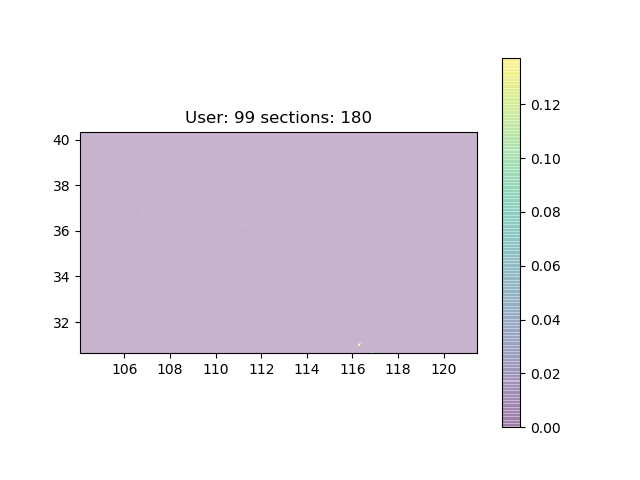

In [22]:
fig = plt.figure()
for i, densite in enumerate(densites):
    plt.clf()
    plt.imshow(densite, extent=[min(points[i][:,1]), max(points[i][:,1]), min(points[i][:,0]), max(points[i][:,0])],
               interpolation='none', alpha=0.3,origin = "lower")
    plt.title("User: "+str(i+10)+" sections: "+str(sections))
    plt.colorbar()
    plt.savefig("output/user_"+str(i+10)+"_histo_"+str(sections)+".svg", format="svg")

## Méthode à noyaux

<IPython.core.display.Javascript object>


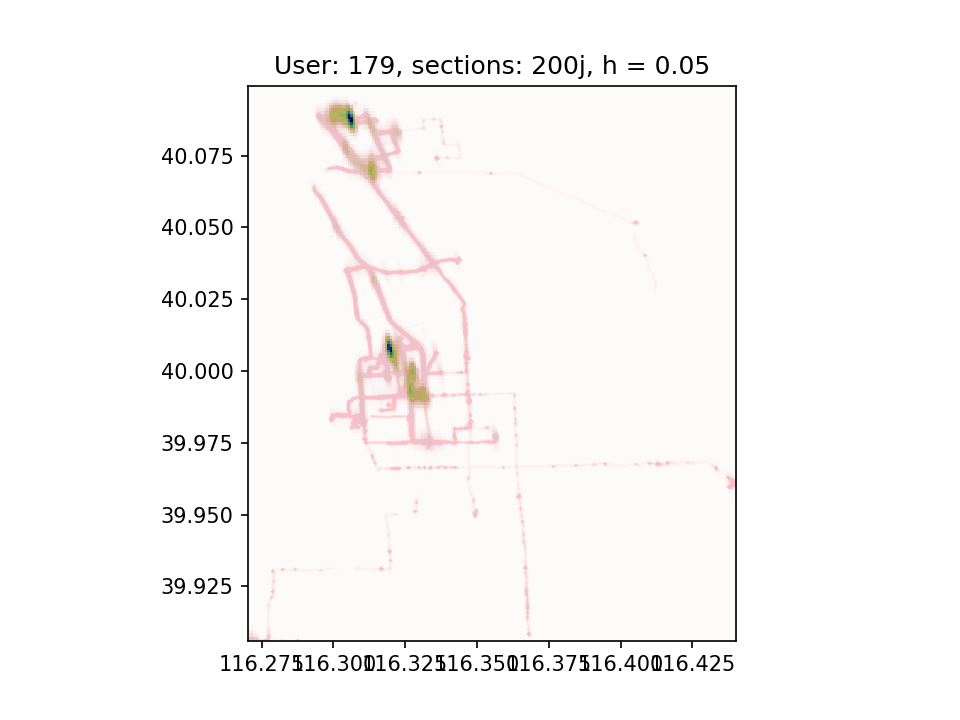

001 kernel…; 008 kernel…; 009 kernel…; 015 kernel…; 016 kernel…; 029 kernel…; 032 kernel…; 035 kernel…; 044 kernel…; 047 kernel…; 054 kernel…; 056 kernel…; 057 kernel…; 059 kernel…; 060 kernel…; 072 kernel…; 077 kernel…; 079 kernel…; 080 kernel…; 081 kernel…; 086 kernel…; 087 kernel…; 088 kernel…; 090 kernel…; 093 kernel…; 094 kernel…; 096 kernel…; 097 kernel…; 098 kernel…; 100 kernel…; 102 kernel…; 105 kernel…; 106 kernel…; 107 kernel…; 113 kernel…; 114 kernel…; 116 kernel…; 117 kernel…; 119 kernel…; 121 kernel…; 130 kernel…; 136 kernel…; 138 kernel…; 143 kernel…; 145 kernel…; 146 kernel…; 147 kernel…; 150 kernel…; 151 kernel…; 152 kernel…; 154 kernel…; 155 kernel…; 161 kernel…; 164 kernel…; 165 kernel…; 166 kernel…; 169 kernel…; 170 kernel…; 171 kernel…; 173 kernel…; 175 kernel…; 177 kernel…; 178 kernel…; 179 kernel…; 

In [9]:
sections = 200j
h = 0.05
fig = plt.figure()

for i, user in enumerate(points):
    print(users[i], end=' ')
    lat = user[:, 0].astype('float64')
    lon = user[:, 1].astype('float64')
    lat_min = lat.min()
    lat_max = lat.max()
    lon_min = lon.min()
    lon_max = lon.max()
    X, Y = np.mgrid[lon_min:lon_max:sections, lat_min:lat_max:sections]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([lon, lat])
    
    print('kernel…', end='; ')
    kernel = st.gaussian_kde(values, bw_method = h)
    Z = np.reshape(kernel(positions).T, X.shape)
    
    plt.clf()
    ax = fig.add_subplot(111)
    ax.plot(lon, lat, 'k.', markersize=2, alpha=0.002, color='pink')
    ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[lon_min, lon_max, lat_min, lat_max])
    ax.set_xlim([lon_min, lon_max])
    ax.set_ylim([lat_min, lat_max])
    plt.title("User: "+users[i]+", sections: "+str(sections)+", h = "+str(h))
    #plt.colorbar()
    plt.savefig("output/user_"+users[i]+"_kde_"+str(sections)+"_"+str(h)+"h"+".jpg", format="jpg")

In [3]:
user = '054'
points = []
points.append(np.array(open_user(DATA_PATH+user+"/Trajectory")))
lat = points[0][:, 0].astype('float64') # !!
lon = points[0][:, 1].astype('float64')
lat_min = lat.min()
lat_max = lat.max()
lon_min = lon.min()
lon_max = lon.max()

fig = plt.figure()
sections = 300j
X, Y = np.mgrid[lon_min:lon_max:sections, lat_min:lat_max:sections]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([lon, lat])
for h in [0.01, 0.02, 0.03, 0.04, 0.05]:
    print('h: '+str(h), end='; ')
    kernel = st.gaussian_kde(values, bw_method = h)
    Z = np.reshape(kernel(positions).T, X.shape)
    
    plt.clf()
    ax = fig.add_subplot(111)
    ax.plot(lon, lat, 'k.', markersize=2, alpha=0.002, color='pink')
    ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[lon_min, lon_max, lat_min, lat_max])
    ax.set_xlim([lon_min, lon_max])
    ax.set_ylim([lat_min, lat_max])
    plt.title("User: "+user+", sections: "+str(sections)+", h = "+str(h))
    #plt.colorbar()
    plt.savefig("output/user_"+user+"_kde_"+str(sections)+"_h_"+str(h)+".jpg", format="jpg")

<IPython.core.display.Javascript object>

h: 0.01; h: 0.02; h: 0.03; h: 0.04; h: 0.05; 

### Fenêtre de Parzen TME

In [104]:
def phi(x):
    return sqrt(x[0]**2+x[1]**2) <= 1/2
def pn_x_parzen(echantillons, x , hn): 
    nombre_points_dans_region = 0
    for point in echantillons:
        nombre_points_dans_region += phi((x-point)/hn)
    #print(nombre_points_dans_region)
    #print(len(echantillons))
    return nombre_points_dans_region/(len(echantillons) * hn**2)

In [126]:
def noyau_parzen(echantillons, hn, steps):
    lat_min = min(echantillons[:,0])
    lat_max = max(echantillons[:,0])
    lon_min = min(echantillons[:,1])
    lon_max = max(echantillons[:,1])
    xx,yy = np.meshgrid(np.linspace(lon_min, lon_max, steps), np.linspace(lat_min, lat_max, steps))
    grid = np.c_[xx.ravel(),yy.ravel()]
    probas = []
    for point in grid:
        probas.append(pn_x_parzen(echantillons, point[::-1], hn))
    somme = sum(probas)
    for i in range(len(probas)):
        probas[i] /= somme

    return np.array(probas).reshape(steps, steps)

In [127]:
sections = 25
hn = 0.04
probas0  = noyau_parzen(points[24][:, 0:2], hn, sections)

KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.imshow(probas0, extent=[min_lon, max_lon, min_lat, max_lat],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.title("Fenêtre de Parzen, hn = "+str(hn)+", sections = "+str(sections))
plt.colorbar()

In [75]:
probas1 = noyau_parzen(points[:, 0:2], 0.1, 35)

In [82]:
print(sum(sum(probas1)))

1.0


<IPython.core.display.Javascript object>


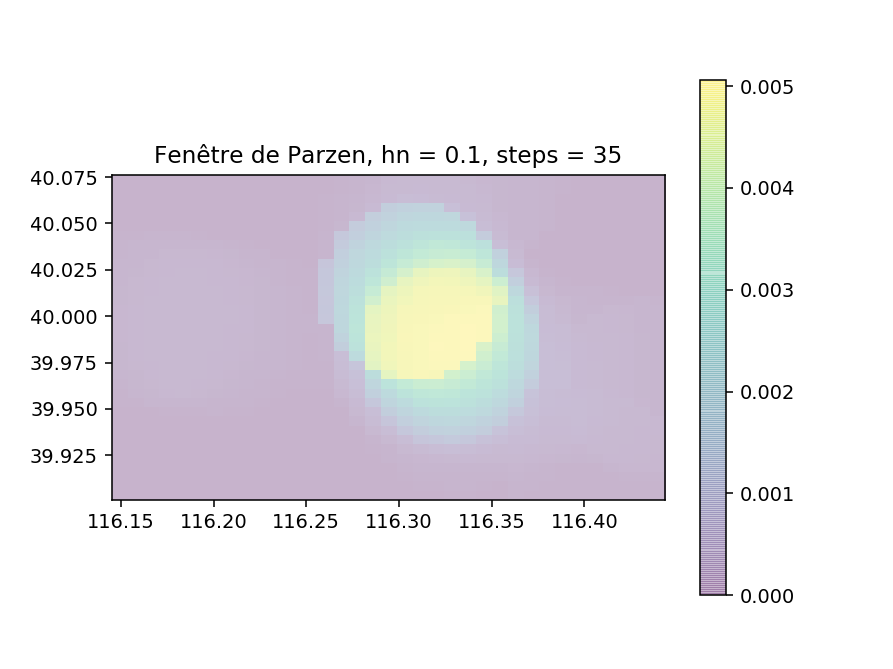

In [78]:
plt.figure()
plt.imshow(probas1, extent=[min_lon, max_lon, min_lat, max_lat],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.title("Fenêtre de Parzen, hn = 0.1, steps = 35")
plt.colorbar()

In [81]:
probas2 = noyau_parzen(points[:, 0:2], 0.01, 35)

In [83]:
print(sum(sum(probas2)))

1.0


<IPython.core.display.Javascript object>


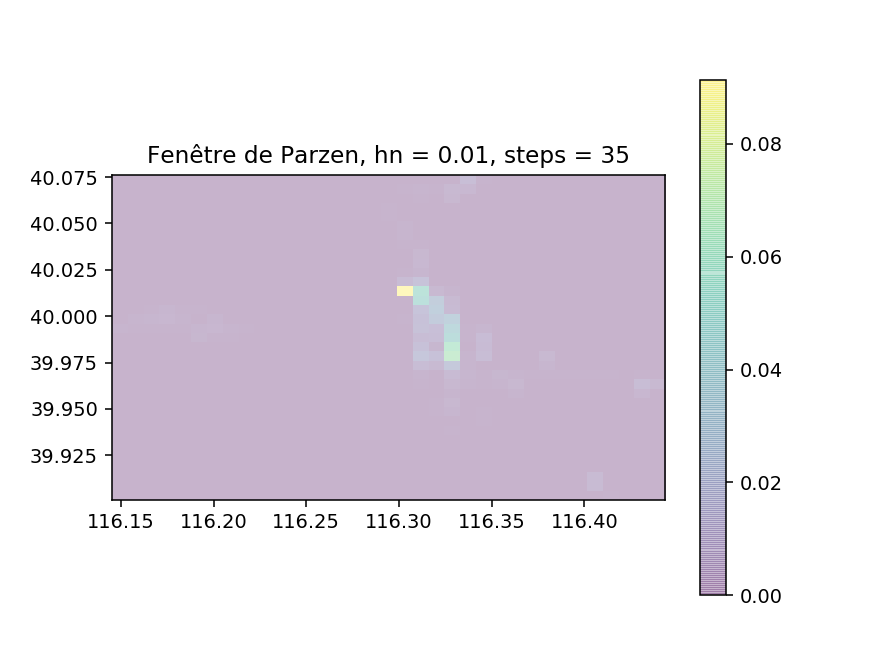

In [84]:
plt.figure()
plt.imshow(probas2, extent=[min_lon, max_lon, min_lat, max_lat],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.title("Fenêtre de Parzen, hn = 0.01, steps = 35")
plt.colorbar()